# **Построение оптимального по Марковитцу портфеля**

In [1]:
data <- read.csv('stocks.csv',header = TRUE)
head(data)

,Date,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-01-03 00:00:00-05:00,156.76,33.29,162.8040,141.17,173.8964,52.05314,540.6338,138.8345
2,2022-01-04 00:00:00-05:00,155.73,33.76,157.2251,140.51,176.9583,53.46270,523.1020,141.4660
3,2022-01-05 00:00:00-05:00,155.19,33.02,151.4508,140.40,174.8812,53.40779,508.6877,139.9076
4,2022-01-06 00:00:00-05:00,156.90,32.96,149.5168,142.82,176.9583,53.30711,512.4793,137.5654
5,2022-01-07 00:00:00-05:00,157.83,34.38,149.7585,140.96,178.3723,54.09426,496.8628,136.9449
6,2022-01-10 00:00:00-05:00,156.60,33.95,148.0663,135.74,174.8910,53.45356,491.2143,138.1859


In [2]:
tail(data)

,Date,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
473,2023-11-17 00:00:00-05:00,94.1500,3.570,134.53,115.00,137.79,51.70,372.4200,155.86
474,2023-11-20 00:00:00-05:00,95.0300,3.650,135.84,115.60,138.25,51.68,368.5000,154.03
475,2023-11-21 00:00:00-05:00,94.4500,3.650,136.21,116.07,138.48,51.73,369.3100,154.84
476,2023-11-22 00:00:00-05:00,95.0700,3.650,136.83,115.57,138.56,51.40,369.4900,156.47
477,2023-11-24 00:00:00-05:00,96.0600,3.660,136.50,117.32,139.69,51.67,370.3200,156.01
478,2023-11-27 00:00:00-05:00,95.1801,3.695,136.98,117.40,139.40,51.30,382.1967,156.50


In [3]:
(nAsset <- dim(data)[2])

[1] 9

In [4]:
(nDays <- dim(data)[1])

[1] 478

Переводим первый столбец из строки в переменную типа Date

In [5]:
Dates <- data[,1]
Dates <- as.Date(Dates, "%Y-%m-%d")
head(Dates)

[1] "2022-01-03" "2022-01-04" "2022-01-05" "2022-01-06" "2022-01-07"
[6] "2022-01-10"

In [10]:
install.packages('xts')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [11]:
library(xts)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Убираем первый столбец c датами остальные переводим в тип xts( time series).

In [12]:
histData <- data[2:nAsset]
sample.xts <- as.xts(histData, order.by = Dates)
head(sample.xts)

              DIS  DISH      DLR   DLTR      DOV      DOW      DPZ      DRI
2022-01-03 156.76 33.29 162.8040 141.17 173.8964 52.05314 540.6338 138.8345
2022-01-04 155.73 33.76 157.2251 140.51 176.9583 53.46270 523.1020 141.4660
2022-01-05 155.19 33.02 151.4508 140.40 174.8812 53.40779 508.6877 139.9076
2022-01-06 156.90 32.96 149.5168 142.82 176.9583 53.30711 512.4793 137.5654
2022-01-07 157.83 34.38 149.7585 140.96 178.3723 54.09426 496.8628 136.9449
2022-01-10 156.60 33.95 148.0663 135.74 174.8910 53.45356 491.2143 138.1859

Выделим 30 последних дат на проверку результата, а первые nDays-30 оставим на построение портфеля

In [13]:
 Lag <- 30
 (testData <- sample.xts[(nDays-Lag):nDays,])

               DIS  DISH    DLR   DLTR    DOV   DOW      DPZ    DRI
2023-10-13 84.3500 5.030 122.60 107.94 138.12 49.73 346.8100 134.00
2023-10-16 85.7100 4.960 123.72 110.10 140.78 50.19 351.6800 138.81
2023-10-17 86.2000 5.020 123.29 115.37 141.59 50.73 350.4900 140.81
2023-10-18 84.6800 5.050 120.56 113.75 135.83 50.08 345.1200 140.72
2023-10-19 83.2500 4.950 115.64 113.11 134.43 49.45 344.3100 142.26
2023-10-20 82.6500 4.990 115.81 110.53 134.69 48.99 347.6900 140.67
2023-10-23 83.1000 4.760 117.43 108.97 133.85 48.24 348.3000 141.78
2023-10-24 82.5600 4.890 119.47 108.03 132.33 49.24 353.5900 142.09
2023-10-25 80.5900 4.780 116.96 108.30 130.08 47.54 349.9100 142.20
2023-10-26 79.7800 4.860 120.93 108.82 130.55 48.02 345.9400 142.19
2023-10-27 79.3300 4.680 122.35 108.24 128.42 48.11 340.6000 142.49
2023-10-30 80.6800 4.780 122.08 109.85 128.42 48.34 338.7100 143.35
2023-10-31 81.5900 4.900 124.36 111.09 129.95 48.34 338.9900 145.53
2023-11-01 81.0700 4.890 126.47 111.49 129.08 48

In [14]:
 sample.xts <- sample.xts[1:(nDays-Lag),]
 tail(sample.xts)

             DIS DISH    DLR   DLTR    DOV   DOW    DPZ    DRI
2023-10-06 82.94 5.00 117.37 105.35 138.89 50.28 341.56 136.94
2023-10-09 84.70 5.12 119.05 104.71 140.37 50.81 350.14 137.08
2023-10-10 84.99 5.15 120.45 108.12 141.03 51.31 355.60 138.21
2023-10-11 84.85 5.07 124.42 107.03 142.18 50.89 354.05 137.52
2023-10-12 84.35 5.13 124.44 107.47 140.22 50.25 350.17 134.25
2023-10-13 84.35 5.03 122.60 107.94 138.12 49.73 346.81 134.00

In [15]:
nDays <- nDays - Lag

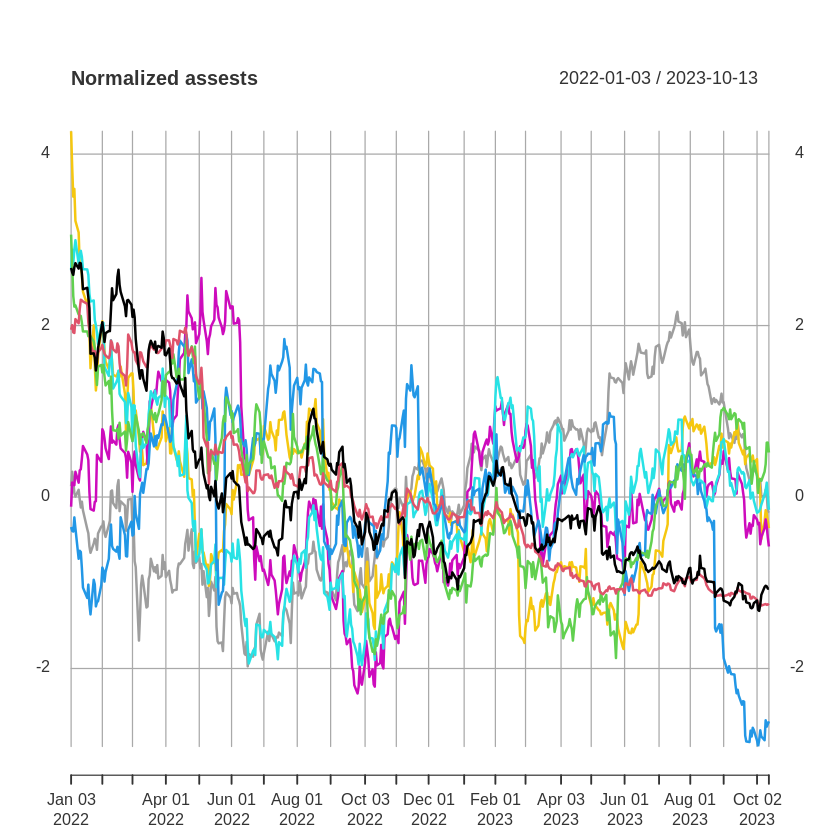

In [16]:
std_data <- scale(sample.xts)
plot(std_data,lty=1,main='Normalized assests',type = "l")

Переходим к рядам из геометрических доходностей

In [37]:
install.packages('qrmtools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘TTR’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘nloptr’, ‘RcppArmadillo’, ‘quantmod’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’




In [38]:
library(qrmtools)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [45]:
stock.returns <- returns(sample.xts,method = 'simple')
head(stock.returns)

                    DIS         DISH          DLR          DLTR          DOV
2022-01-04 -0.006570546  0.014118276 -0.034268064 -0.0046752403  0.017607818
2022-01-05 -0.003467497 -0.021919369 -0.036725990 -0.0007828668 -0.011737550
2022-01-06  0.011018696 -0.001817122 -0.012770263  0.0172365636  0.011876956
2022-01-07  0.005927393  0.043082586  0.001617046 -0.0130233897  0.007990333
2022-01-10 -0.007793168 -0.012507280 -0.011300031 -0.0370317890 -0.019516666
2022-01-11  0.008237505  0.042120774 -0.001318882  0.0100927881  0.007694262
                    DOW          DPZ          DRI
2022-01-04  0.027079271 -0.032428235  0.018954338
2022-01-05 -0.001027191 -0.027555501 -0.011015935
2022-01-06 -0.001885071  0.007453801 -0.016741111
2022-01-07  0.014766420 -0.030472422 -0.004510683
2022-01-10 -0.011844304 -0.011368326  0.009062132
2022-01-11  0.013356047 -0.032288917 -0.012790754

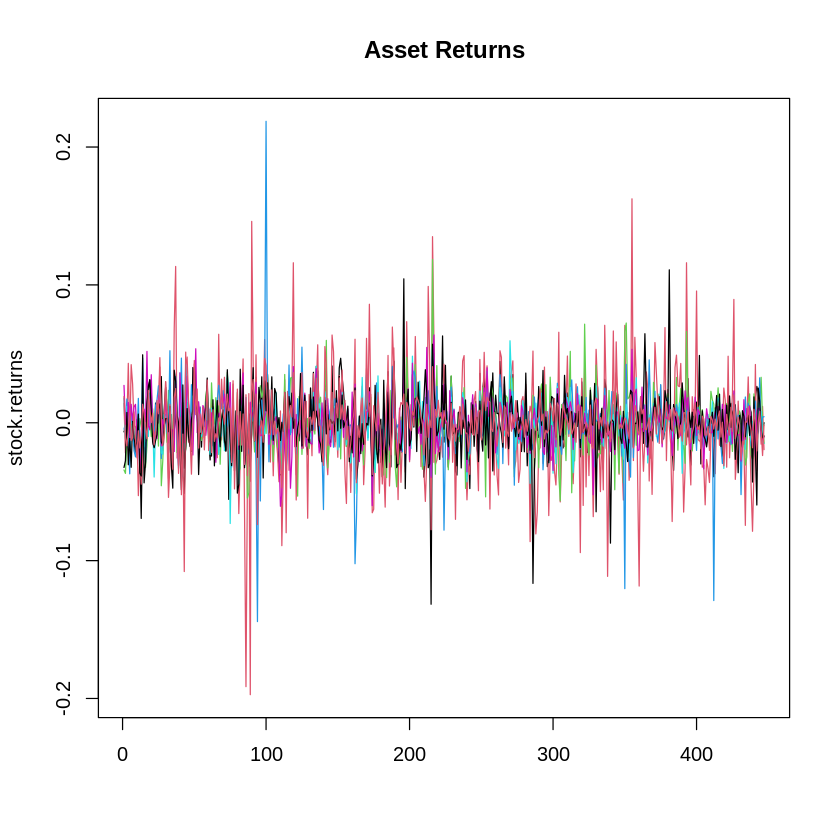

In [46]:
matplot(stock.returns,lty=1,main='Asset Returns',type = "l")

Считаем ковариационную матрицу доходностей

In [47]:
(cov <- cov(stock.returns))

,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI
DIS,0.0004304009,0.0004200518,1.772449e-04,1.591446e-04,0.0001961530,1.768557e-04,1.525247e-04,0.0001767486
DISH,0.0004200518,0.0015907557,3.413318e-04,1.694737e-04,0.0003197936,2.798639e-04,1.881523e-04,0.0002659298
DLR,0.0001772449,0.0003413318,4.506353e-04,8.022793e-05,0.0001691331,1.082357e-04,1.233569e-04,0.0001194012
DLTR,0.0001591446,0.0001694737,8.022793e-05,5.524085e-04,0.0001345280,1.064979e-04,1.186773e-04,0.0001438306
DOV,0.0001961530,0.0003197936,1.691331e-04,1.345280e-04,0.0002759516,1.699366e-04,1.258708e-04,0.0001374356
DOW,0.0001768557,0.0002798639,1.082357e-04,1.064979e-04,0.0001699366,2.911674e-04,9.367984e-05,0.0001057875
DPZ,0.0001525247,0.0001881523,1.233569e-04,1.186773e-04,0.0001258708,9.367984e-05,4.351491e-04,0.0001441111
DRI,0.0001767486,0.0002659298,1.194012e-04,1.438306e-04,0.0001374356,1.057875e-04,1.441111e-04,0.0003097471


In [48]:
n <- ncol(cov)
Amat <- matrix (1, nrow=n)
Amat <- cbind(Amat, -diag(n))
bvec <- 1
meq <- 1

In [49]:
max.allocation <- 0.45
bvec <- c(bvec, rep(-max.allocation, n))
bvec

[1]  1.00 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45

Зададим максимальную доходность и шаг изменения доходности и определим количество итераций цикла по доходности.

In [50]:
risk.premium.up <-0.5
risk.increment <- 0.01
(loops <- risk.premium.up / risk.increment + 1)

[1] 51

In [51]:
loop <- 1

Инициализируем матрицу, где будем хранить оптимальные портфели и различные статистики

In [52]:
eff <- matrix(nrow=loops, ncol=n+3)
colnames(eff) <- c(colnames(stock.returns), "Std.Dev", "Exp.Return", "sharpe")

Получаем оптимальный портфель, доходность, стандартное отклонение и коэффициент Шарпа на каждой итерации

In [55]:
install.packages('quadprog')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
library(quadprog)

In [57]:
mu <- colMeans(stock.returns)

for (i in seq(from=0, to=risk.premium.up, by=risk.increment)){
    dvec <- mu * i
    sol <- solve.QP(cov, dvec=dvec, Amat=Amat, bvec=bvec, meq=meq)
    eff[loop,"Std.Dev"] <- sqrt(sum(sol$solution *colSums((cov * sol$solution))))
    eff[loop,"Exp.Return"] <- as.numeric(sol$solution %*% colMeans(stock.returns))
    eff[loop,"sharpe"] <- eff[loop,"Exp.Return"] / eff[loop,"Std.Dev"]
    eff[loop,1:n] <- sol$solution
    loop <- loop+1
}
eff <- as.data.frame(eff)
head(eff)

,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI,Std.Dev,Exp.Return,sharpe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.008397536,-0.0878003,0.1645261,0.09862800,0.1470161,0.3027145,0.13418434,0.2323337,0.01246983,6.214263e-05,0.004983439
2,-0.017945558,-0.1132522,0.1723602,0.09470809,0.1493133,0.3335867,0.11571820,0.2655112,0.01252313,1.953454e-04,0.015598774
3,-0.044288652,-0.1387041,0.1801944,0.09078818,0.1516104,0.3644590,0.09725206,0.2986887,0.01268167,3.285482e-04,0.025907328
4,-0.070631746,-0.1641561,0.1880285,0.08686828,0.1539076,0.3953312,0.07878592,0.3318663,0.01294160,4.617510e-04,0.035679601
5,-0.096974840,-0.1896080,0.1958627,0.08294837,0.1562048,0.4262034,0.06031978,0.3650438,0.01329696,5.949538e-04,0.044743599
6,-0.122038272,-0.2149339,0.2038524,0.07947666,0.1624429,0.4500000,0.04228664,0.3989135,0.01372538,7.239481e-04,0.052745198


Определяем точку, где коэффициент Шарпа максимален

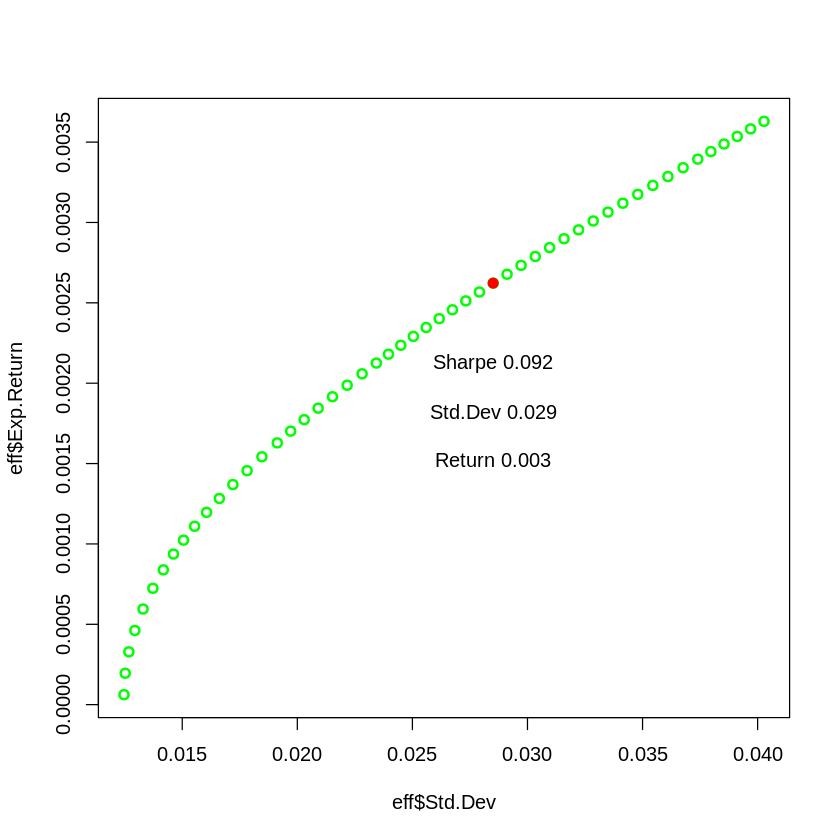

In [76]:
eff.optimal.point <- eff[eff$sharpe==max(eff$sharpe),]

plot(eff$Std.Dev,eff$Exp.Return,type = 'b',pch =21,col = 'green',lwd = 2)
points(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return,pch = 20,col = 'red',lwd = 4)
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0005,paste('Sharpe',round(eff.optimal.point$sharpe,3)))
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0008,paste('Std.Dev',round(eff.optimal.point$Std.Dev,3)))
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0011,paste('Return',round(eff.optimal.point$Exp.Return,3)))

### Оптимальный портфель по Марковитцу

In [77]:
eff.optimal.point

,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI,Std.Dev,Exp.Return,sharpe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,-0.2573599,-0.78412,0.45,0.2842707,0.45,0.45,-0.04279081,0.45,0.02850885,0.002622575,0.09199161


Предположим, у Вас 1000000 долларов. Разделим его на доли вложения в каждый актив. Для этого нормируем оптимальный портфель так, чтобы сумма модулей была равна 1.

In [78]:
eff.optimal.point<-eff.optimal.point[1:ncol(sample.xts)]
sabs <- sum(abs(eff.optimal.point))
norm_eff.optimal.point <- eff.optimal.point/sabs
sum(abs(norm_eff.optimal.point))

[1] 1

Поделим весь капитал на долю вложения на каждый актив

In [79]:
N <- 1000000
(d_money <- norm_eff.optimal.point*N)

,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,-81223.46,-247470.3,142021.2,89716.58,142021.2,142021.2,-13504.89,142021.2


В итоге портфель на следующий интервал времени в количестве акций на последний день тренировочной выборки

In [80]:
nData <- dim(sample.xts)[1]
(portfolio <- as.integer (d_money/ histData[nData,]))

[1]   -962 -49198   1158    831   1028   2855    -38   1059

Его стоимость на момент создания с учетом округлений

In [91]:
(start_sum <- sum(abs(portfolio)*histData[nData,]))

[1] 999330.9

Посмотрим на стоимость нашего портфеля по тестовым 30 дням

In [82]:
res <- rep(0,Lag)
for (i in 1 :Lag)
{
  change <- histData[nData+i,]-histData[nData,]
  res[i]<-sum(portfolio*change)
  print(paste(Dates[nData+i],' ',res[i]))
}

[1] "2023-10-16   14183.9764928818"
[1] "2023-10-17   19179.7547569275"
[1] "2023-10-18   6990.21090984344"
[1] "2023-10-19   5480.26293468475"
[1] "2023-10-20   -715.833952903748"
[1] "2023-10-23   8893.93663883209"
[1] "2023-10-24   6018.5770778656"
[1] "2023-10-25   3733.10062789917"
[1] "2023-10-26   7599.69646835327"
[1] "2023-10-27   16638.5534133911"
[1] "2023-10-30   13084.5004043579"
[1] "2023-10-31   13846.817697525"
[1] "2023-11-01   16291.674287796"
[1] "2023-11-02   12034.9065341949"
[1] "2023-11-03   8882.82296848297"
[1] "2023-11-06   101133.317504883"
[1] "2023-11-07   90422.0848922729"
[1] "2023-11-08   81407.4304599762"
[1] "2023-11-09   85655.2153739929"
[1] "2023-11-10   95137.6765670776"
[1] "2023-11-13   97156.3462839127"
[1] "2023-11-14   115180.129256725"
[1] "2023-11-15   118539.807169914"
[1] "2023-11-16   119857.698243618"
[1] "2023-11-17   109544.960641384"
[1] "2023-11-20   105404.905378342"
[1] "2023-11-21   107988.101106644"
[1] "2023-11-22   108553.54580

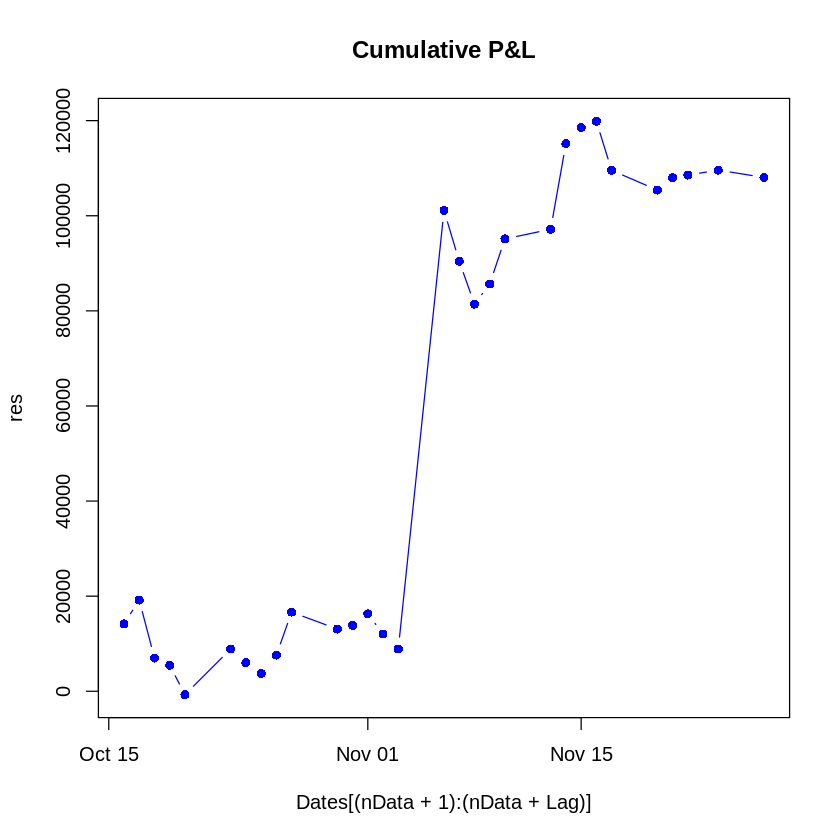

In [83]:
plot(Dates[(nData+1):(nData+Lag)], res,main='Cumulative P&L',type="b",col = 'blue',pch=16)

In [94]:
res[Lag] * 100 / start_sum

[1] 10.81274

Доходность составила 10 процентов за месяц. Резкий рост капитала 6 ноября обусловлен тем, что мы зашортили акции DISH Network Corporation, которые обвалились на выходных с 4 по 5 ноября

In [116]:
histData[nData+15,]

,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
463,85.07,5.49,132.93,116.35,134.36,49.73,361.94,150.71


In [117]:
histData[nData+16,]

,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
464,84.02,3.44,129.49,114.99,132.76,49.34,368.25,149.29


Для наглядности сравним с портфелем, если бы равномерно вложились в каждый из этих 8 активов

In [150]:
uniform <- as.integer (c(N / 8, N / 8, N / 8, N / 8, N / 8, N / 8, N / 8, N / 8))
uniform_portfolio <- as.integer (uniform / histData[nData,])

In [151]:
(uniform_start_sum <- sum(abs(long_uniform_portfolio)*histData[nData,]))

[1] 999551.5

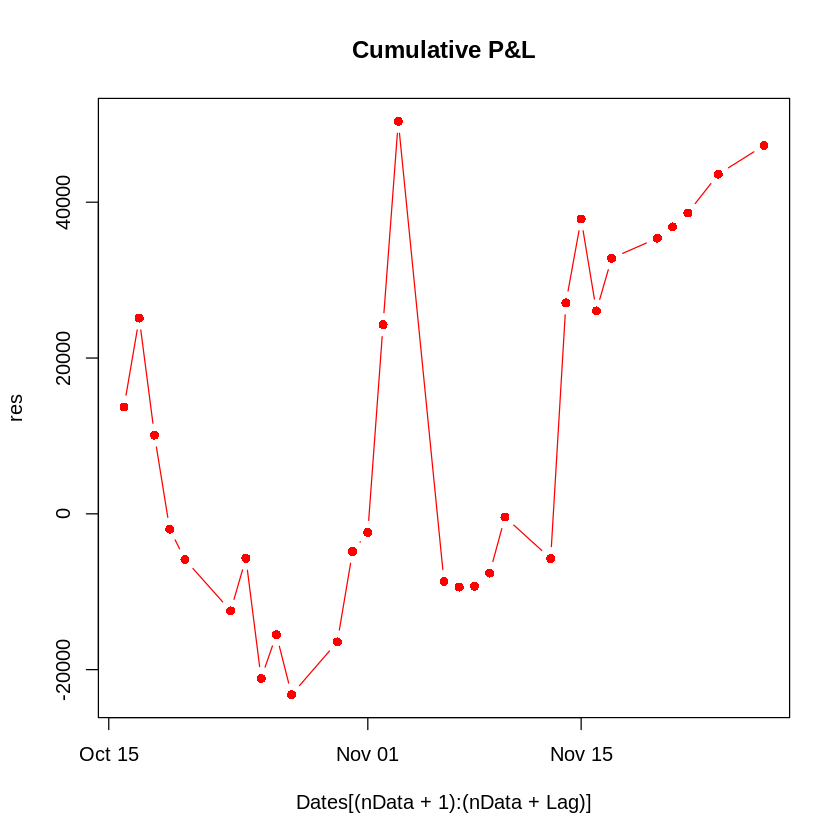

In [165]:
res <- rep(0,Lag)
for (i in 1 :Lag)
{
  change <- histData[nData+i,]-histData[nData,]
  res[i]<-sum(uniform_portfolio*change)
  #print(paste(Dates[nData+i],' ',res[i]))
}
plot(Dates[(nData+1):(nData+Lag)], res,main='Cumulative P&L',type="b",col = 'red',pch=16)

In [155]:
res[Lag] * 100 / start_sum

[1] 4.73172

Тут уже доходность чуть меньше 5 процентов. По Марковицу результат получился в 2 раза лучше!